<a href="https://colab.research.google.com/github/PauloMarvin/ETL-CVM/blob/feature%2Fdata-scrapping-link/CVM_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Rotina de scraping

## Rotina para os dados anteriores ao ano de 2021

In [2]:
class Soup:
  def __init__(self, url):
    self.url = url
  
  def soup_object(self): # obtenção do objeto BeautifulSoup.
    response = urlopen(self.url) # requisição.
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser') # objeto BeautifulSoup.

    return soup

class Scrape:
  def __init__(self, soup):
    self.soup = soup
  
  def get_element(self, tag, tag_class= None): # busca um único elemento por tag ou tag mais classe.
    return self.soup.find(tag, {'class': tag_class})
  
  def get_elements(self, tag, another_soup= None, tag_class= None): # busca elementos do objeto BeautifulSoup por tag ou tag mais classe.
    if another_soup == None:
      return self.soup.find_all(tag, {'class': tag_class}) 
    else: # caso o objeto BeautifulSoup tenha sido obtido por outro objeto BeautifulSoup.
      return another_soup.find_all(tag, {'class': tag_class})
  
  def get_file_link(self, file, attribute):
    return file[attribute] # 


A obtenção do objeto BeautifulSoup da página com os dados anteriores a 2021 é feita:

In [3]:
get_soup = Soup('https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/')
soup = get_soup.soup_object()

Os arquivos estão dentro da ***tag*** *pre*, como pode ser visto na imagem.

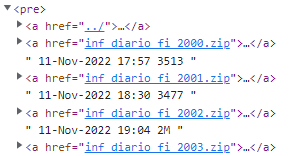

Portanto, é necessário obter o objeto *BeautifulSoup* contendo-a:

In [4]:
scrape = Scrape(soup)
element = scrape.get_element('pre')

E para obter cada um dos arquivos procura-se as ***tags*** *a* com o parâmetro *href*:

In [5]:
elements = scrape.get_elements('a', element)

Os *links* para o *download* dos arquivos *zip* são armazenados em uma lista:

In [28]:
links_files = list()

In [29]:
for link_file in elements[1:]: # o primeito elemento da lista é um link que direciona pra outro repositório, portanto é feito o slice na lista.
  links_files.append(scrape.get_file_link(link_file, 'href'))

In [30]:
links_files

['HIST/',
 'inf_diario_fi_202101.zip',
 'inf_diario_fi_202102.zip',
 'inf_diario_fi_202103.zip',
 'inf_diario_fi_202104.zip',
 'inf_diario_fi_202105.zip',
 'inf_diario_fi_202106.zip',
 'inf_diario_fi_202107.zip',
 'inf_diario_fi_202108.zip',
 'inf_diario_fi_202109.zip',
 'inf_diario_fi_202110.zip',
 'inf_diario_fi_202111.zip',
 'inf_diario_fi_202112.zip',
 'inf_diario_fi_202201.zip',
 'inf_diario_fi_202202.zip',
 'inf_diario_fi_202203.zip',
 'inf_diario_fi_202204.zip',
 'inf_diario_fi_202205.zip',
 'inf_diario_fi_202206.zip',
 'inf_diario_fi_202207.zip',
 'inf_diario_fi_202208.zip',
 'inf_diario_fi_202209.zip',
 'inf_diario_fi_202210.zip',
 'inf_diario_fi_202211.zip',
 'inf_diario_fi_202212.zip',
 'inf_diario_fi_202301.zip']

### Trabalhando com os arquivos *zip*

Cada arquivo *zip* contém arquivos *.csv* com dados mensais. O que torna necessário descompactá-los para posterior concatenação em um único dataframe.

**TRABALHO EM ANDAMENTO!**

## Rotina de scraping do ano de 2021 em diante

O objeto *BeautifulSoup* é instanciado: 

In [17]:
get_soup = Soup('https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/')

In [18]:
soup = get_soup.soup_object()

Assim como para os anos anteriores a 2021, os links para download dos dados, estão contidos na ***tag*** *pre*, mais especificamente com a ***tag*** *a*.

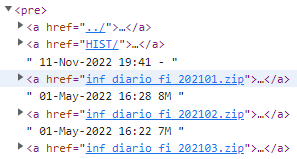

In [19]:
scrape = Scrape(soup)

In [20]:
element = scrape.get_element('pre')

In [23]:
elements = scrape.get_elements('a', element)

Os *links* são armazenados em uma lista:

In [31]:
links_files = list()

In [33]:
for link_file in elements[2:]: # os dois primeiros links redirecionam para outras páginas, não sendo o objetivo obtê-los.
  links_files.append(scrape.get_file_link(link_file, 'href'))

# Concatenação dos *dataframes*

In [37]:
class Data:
  def __init__(self, data_list):
    self.dl = data_list # lista com os dados mensais do CVM.

  def concat_dataframes(self):
    dataframes = list() # lista que conterá todos os dataframes gerados pelos arquivos.

    for link in self.dl[1:]: # o primeiro arquivo é o dicionário dos dados, então o slice pega apenas os dados necessários.
      data = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/' + link # link completo para o arquivo.
      dataframe = pd.read_csv(data, sep= ';', compression= 'zip')
      dataframes.append(dataframe)

    concated_dataframe = pd.concat(dataframes)

    return concated_dataframe

Instacia-se a classe Data passando os *links* dos arquivos.

In [38]:
data = Data(links_files)

E é feita a concatenação dos dados de 2021 em diante:

In [40]:
df = data.concat_dataframes()

In [41]:
df

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2021-02-01,1093459.20,27.504503,1091740.78,0.0,0.0,1
1,FI,00.017.024/0001-53,2021-02-02,1093541.56,27.504054,1091722.98,0.0,0.0,1
2,FI,00.017.024/0001-53,2021-02-03,1093599.37,27.503804,1091713.02,0.0,0.0,1
3,FI,00.017.024/0001-53,2021-02-04,1093652.55,27.502934,1091678.50,0.0,0.0,1
4,FI,00.017.024/0001-53,2021-02-05,1093433.76,27.501947,1091639.34,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
171151,FI,97.929.213/0001-34,2023-01-04,67419133.33,10.124107,76936345.51,0.0,0.0,2
171152,FI,97.929.213/0001-34,2023-01-05,76932242.05,10.137062,77034792.52,0.0,0.0,2
171153,FI,97.929.213/0001-34,2023-01-06,77014439.99,10.148012,77118005.35,0.0,0.0,2
171154,FI,97.929.213/0001-34,2023-01-09,77099535.97,10.159148,77202629.80,0.0,0.0,2


# Exportação dos dados

In [43]:
df.to_csv('dados_FI_2021_atual.csv', index= False)